In [57]:
import numpy as np
import numba 
import math
import time
import cv2 as cv2
import matplotlib.pyplot as plt

charge=[x,y,c]

In [200]:
X=0
Y=1
C=2
TIMESCALE=10
E0=1

In [201]:

def compute_force(c1,c2):
    c_dir=c1[C]*c2[C]
    dist=np.sqrt(np.square(c1[X]-c2[X])+np.square(c1[Y]-c2[Y]))
    dir_vec=[c1[X]-c2[X],c1[Y]-c2[Y]]
    dir_len=dist
    norm_vec=[dir_vec[X]/dir_len,dir_vec[Y]/dir_len]
    return_const=(1/(4*math.pi*np.square(dist)*E0))*TIMESCALE*c_dir
    return_vec=[norm_vec[X]*return_const,norm_vec[Y]*return_const]
    return return_vec


In [202]:
compute_force([1,0,1],[-1,0,1])

[0.1989436788648692, 0.0]

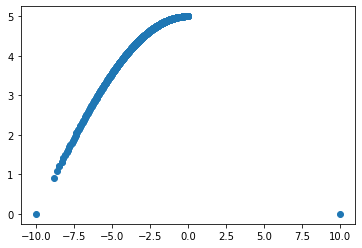

array([[ -0.0113882 ,   5.        ,  -1.        ],
       [ -0.02277642,   4.99998444,  -1.        ],
       [ -0.03416471,   4.99995331,  -1.        ],
       ...,
       [ -8.44938738,   1.20329829,  -1.        ],
       [-10.        ,   0.        ,  -1.        ],
       [ 10.        ,   0.        ,   1.        ]])

In [203]:
lst=[]
testcharge=[0,5,-1]
for i in range(463):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],-1]
    
   
    lst.append(testcharge)
testcharge=[0,-5,1]
for i in range(463):
    testcharge_dir=compute_force(testcharge,[-10,0,1])
    testcharge_dir_2=compute_force(testcharge,[10,0,-1])
    testcharge=[testcharge_dir[X]+testcharge[X]+testcharge_dir_2[X],testcharge_dir[Y]+testcharge[Y]+testcharge_dir_2[Y],-1]
    
   
    lst.append(testcharge)
lst.append([-10,0,-1])
lst.append([10,0,1])
lst=np.array(lst)
plt.plot(lst[:,0], lst[:,1],"o")
plt.show()
lst